In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import utils, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add, Input, ZeroPadding2D, AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import cv2
from glob import glob
from numpy import floor
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


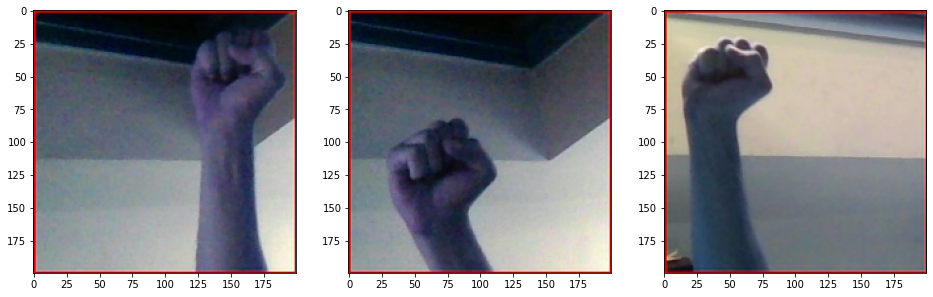

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
path_test = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),padding='same' ,strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),padding='same' ,strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),padding='same' ,strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(29,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

alex = AlexNet((64, 64, 3))
alex.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 14, 14, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 14, 14, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 14, 14, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 7, 7, 96)          0         
_________________________________________________________________
conv1 (Conv2D)               (None, 7, 7, 256)         614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 7, 7, 256)         1024

In [5]:
alex_model = alex.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
1224/1224 [==============================] - 513s 416ms/step - loss: 2.1744 - accuracy: 0.3875 - val_loss: 0.6654 - val_accuracy: 0.7895
Epoch 2/10
1224/1224 [==============================] - 142s 116ms/step - loss: 0.2439 - accuracy: 0.9150 - val_loss: 1.3764 - val_accuracy: 0.6999
Epoch 3/10
1224/1224 [==============================] - 137s 112ms/step - loss: 0.1146 - accuracy: 0.9616 - val_loss: 0.7293 - val_accuracy: 0.8180
Epoch 4/10
1224/1224 [==============================] - 137s 112ms/step - loss: 0.0850 - accuracy: 0.9734 - val_loss: 0.7142 - val_accuracy: 0.8528
Epoch 5/10
1224/1224 [==============================] - 181s 148ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 1.2736 - val_accuracy: 0.7652
Epoch 6/10
1224/1224 [==============================] - 174s 142ms/step - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.7579 - val_accuracy: 0.8411
Epoch 7/10
1224/1224 [==============================] - 148s 121ms/step - loss: 0.0429 - accuracy: 0.9876 - val_